In [5]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [7]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=97e7af0f566f0714f7677f8fabb0a143&units=metric&q='

In [17]:
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
# lat = []
# temp = []

cityInfos= []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    cityInfo={
        'lat':response['coord']['lat'],
        'temp':response['main']['temp']
    }
    
    cityInfos.append(cityInfo)
    
    
#     lat.append(response['coord']['lat'])
#     temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.85, 51.51, 59.91, 39.91, 19.01, 14.6, 40.71, 47.61, 32.77, 25.05]
The temperature information received is: [26.58, 23.62, 22.35, 25.15, 29, 25.31, 31.07, 17.14, 30.08, 29.74]


[{'lat': 48.85, 'temp': 26.58},
 {'lat': 51.51, 'temp': 23.48},
 {'lat': 59.91, 'temp': 22.35},
 {'lat': 39.91, 'temp': 25.15},
 {'lat': 19.01, 'temp': 29},
 {'lat': 14.6, 'temp': 25.31},
 {'lat': 40.71, 'temp': 30.84},
 {'lat': 47.61, 'temp': 17.14},
 {'lat': 32.77, 'temp': 30.08},
 {'lat': 25.05, 'temp': 29.74}]

In [19]:
pd.DataFrame(cityInfos)

,lat,temp
0,48.85,26.58
1,51.51,23.48
2,59.91,22.35
3,39.91,25.15
4,19.01,29.00
5,14.60,25.31
6,40.71,30.84
7,47.61,17.14
8,32.77,30.08
9,25.05,29.74


In [9]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.85,26.58
1,London,51.51,23.62
2,Oslo,59.91,22.35
3,Beijing,39.91,25.15
4,Mumbai,19.01,29.00
5,Manila,14.60,25.31
6,New York,40.71,31.07
7,Seattle,47.61,17.14
8,Dallas,32.77,30.08
9,Taipei,25.05,29.74


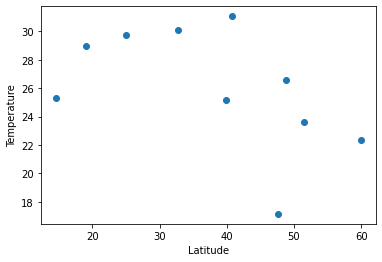

In [10]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [11]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    24.422305
1    24.034785
2    22.811037
3    25.724723
4    28.769526
5    29.411993
6    25.608176
7    24.602954
8    26.764909
9    27.889592
Name: lat, dtype: float64


In [12]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.15x +31.54


The r-value is: -0.25656555562028427


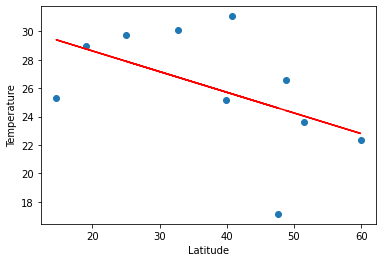

In [16]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: -{rvalue**2}")

# Show plot
plt.show()

In [14]:
# Calculate the temperature for Florence at 43.77 degrees
florence_lat = 43.77
florence_predicted_temp = round(slope * florence_lat + intercept,2)
                                
print(f"The Predicted temperature for Florence will be {florence_predicted_temp}.")

The Predicted temperature for Florence will be 25.16.


In [15]:
# Use API to determine actual temperature
response = requests.get(query_url + "Florence").json()
florence_actual_temp = response['main']['temp']

print(f"The actual temperature of Florence is {florence_actual_temp}")

The actual temperature of Florence is 33.96
